In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [4]:
#tourismData = pd.read_excel("Tourism.xlsx",sheet_name='Tourism')
from google.colab import drive,files
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/Tourism.xlsx'
tourismData = pd.read_excel(path,sheet_name='Tourism')
tourismData.head()

Mounted at /content/drive


,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
tourismData.shape

(4888, 20)

In [6]:
tourismData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

### Analysis and Cleaning of Data

In [7]:
tourismData.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
PreferredLoginDevice,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisited,0
NumberOfFollowups,45


#### There are null values on different columns  (Age, PreferredLoginDevice, DurationOfPitch,NumberOfFollowups,PreferredPropertyStar, NumberofTrips, NumberofChildrenVisited and MonthlyIncome)

#### Looking at the five point data for the continuous columns

In [8]:
tourismData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


#### Replacing null values with mean, median or mode
##### For PreferredLogindevice replacing null with Unknown and DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisited replacing it is with mode
##### For Monthly Income replacing it with Mean
##### For Age replacing it with 50 percentile value.

In [9]:
tourismData["PreferredLoginDevice"].fillna("Unknown", inplace = True)
tourismData['DurationOfPitch'].fillna(tourismData['DurationOfPitch'].mode()[0], inplace = True)
tourismData['NumberOfFollowups'].fillna(tourismData['NumberOfFollowups'].mode()[0], inplace = True)
tourismData['PreferredPropertyStar'].fillna(tourismData['PreferredPropertyStar'].mode()[0], inplace = True)
tourismData['NumberOfTrips'].fillna(tourismData['NumberOfTrips'].mode()[0], inplace = True)
tourismData['NumberOfChildrenVisited'].fillna(tourismData['NumberOfChildrenVisited'].mode()[0], inplace = True)
tourismData['MonthlyIncome'].fillna(tourismData['MonthlyIncome'].mean(), inplace = True)
tourismData['Age'].fillna(37, inplace = True)

#### Looking at the value counts for different columns

In [ ]:
print(tourismData.PreferredLoginDevice.value_counts())
print(tourismData.ProductPitched.value_counts())
print(tourismData.Occupation.value_counts())
print(tourismData.Gender.value_counts())
print(tourismData.MaritalStatus.value_counts())
print(tourismData.Designation.value_counts())
print(tourismData.ProdTaken.value_counts())

Self Enquiry       3444
Company Invited    1419
Unknown              25
Name: PreferredLoginDevice, dtype: int64
Multi           1842
Super Deluxe    1732
Standard         742
Deluxe           342
King             230
Name: ProductPitched, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
0    3968
1     920
Name: ProdTaken, dtype: int64


#### Repolacing "Fe Male" with "Female"

In [ ]:
tourismData['Gender'].replace(['Fe Male'],'Female',inplace=True)
#agebins = [18, 28, 38, 48,61]
#agecats = ['18-27', '28-37', '38-47', '48-61']
#tourismData["Age_Cat"] = pd.cut(tourismData.Age, agebins, labels=agecats)
#tourismData['Age_Cat'].fillna('28-37', inplace = True)

In [ ]:
tourismData.isnull().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
PreferredLoginDevice       0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

# EDA

## Univarate Analysis

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

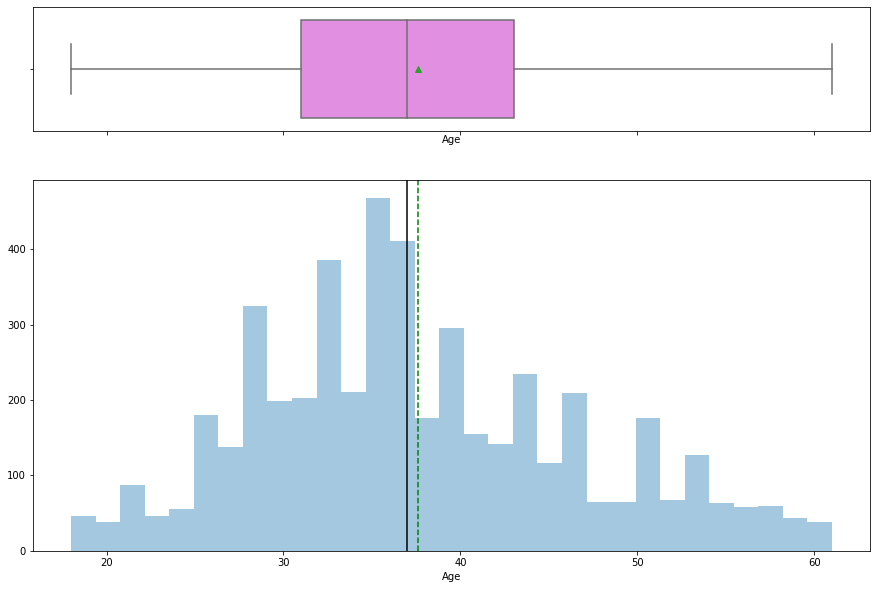

In [ ]:
histogram_boxplot(tourismData['Age'])

### Looking at the Age, the mean and median are very close to each other and there are not many outliers.

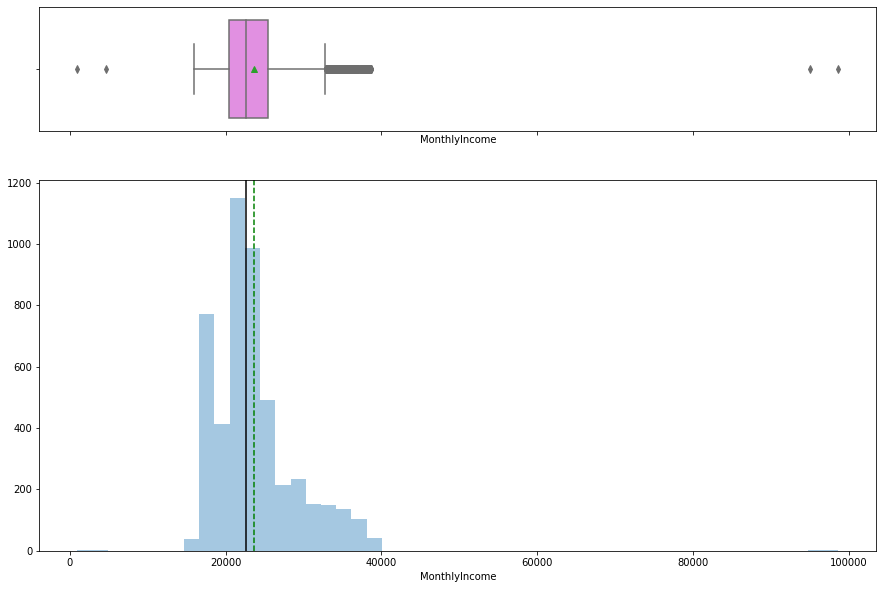

In [ ]:
histogram_boxplot(tourismData['MonthlyIncome'])

### Looking at the Monthly Income, the mean and median are very close to each other and there are many outliers.

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

    plt.show() # show the plot

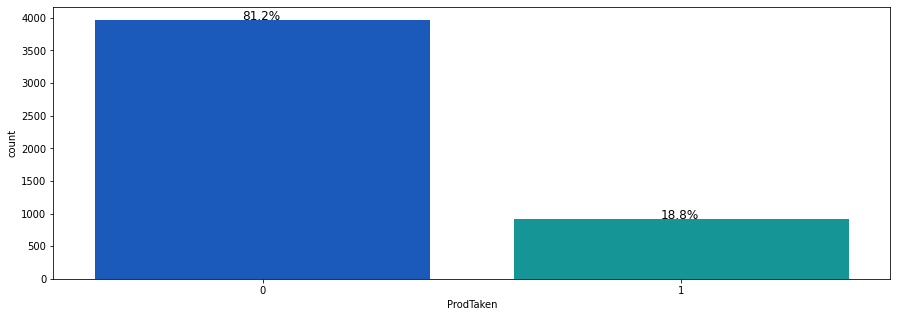

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourismData["ProdTaken"],palette='winter')
perc_on_bar(ax,tourismData["ProdTaken"])

### Looking at the ProdTaken (our target variable), there are around 19% of the customers who are taking the product and around 81% are the potential customers which the campaign has to target.

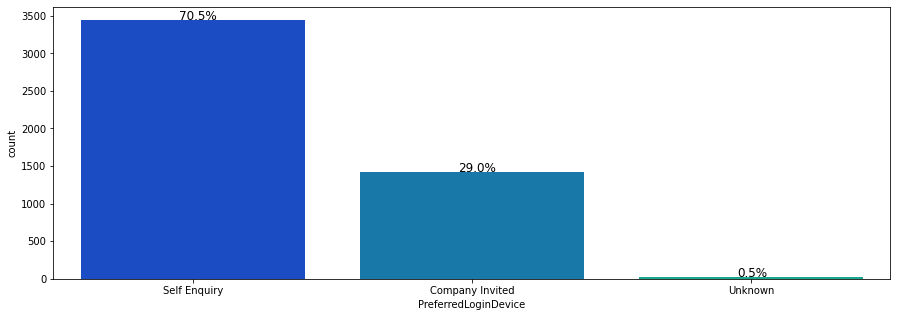

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourismData["PreferredLoginDevice"],palette='winter')
perc_on_bar(ax,tourismData["PreferredLoginDevice"])

### PreferredLoginDevice : Most customers are self enquired (70.5%) rather than company invited (29%)

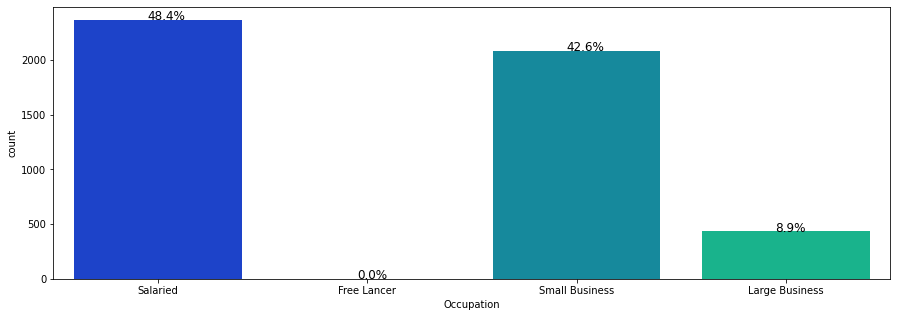

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourismData["Occupation"],palette='winter')
perc_on_bar(ax,tourismData["Occupation"])

### Most customers are Salaried / owning small business

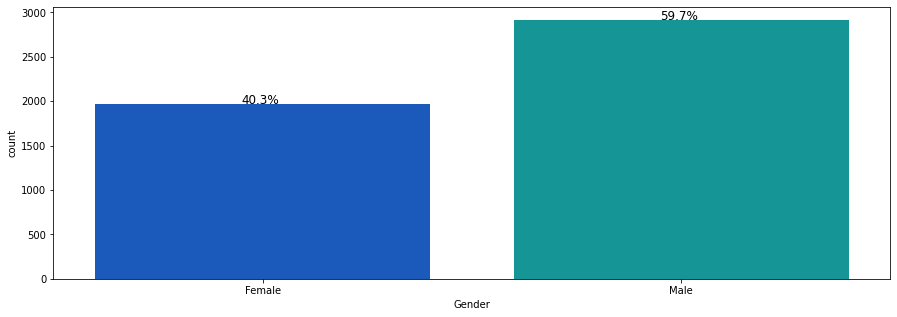

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourismData["Gender"],palette='winter')
perc_on_bar(ax,tourismData["Gender"])

### Around 60/40 distribution you can see b/w Gender (Male/Female)

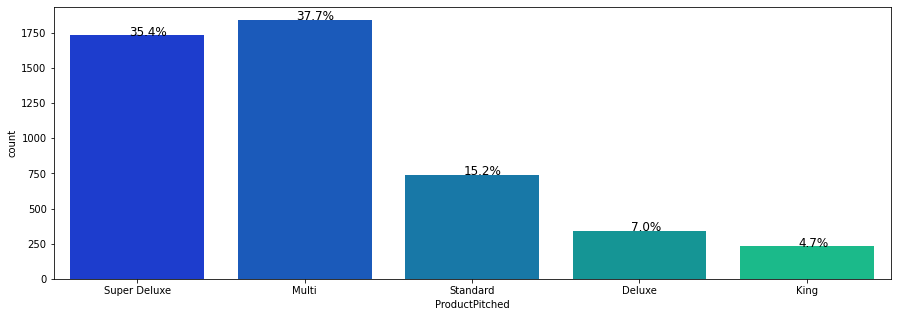

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourismData["ProductPitched"],palette='winter')
perc_on_bar(ax,tourismData["ProductPitched"])

### ProductPitched to customers are mostly SuperDeluxe / Multi (around 35-37%) and StandardProductPitched around 15%

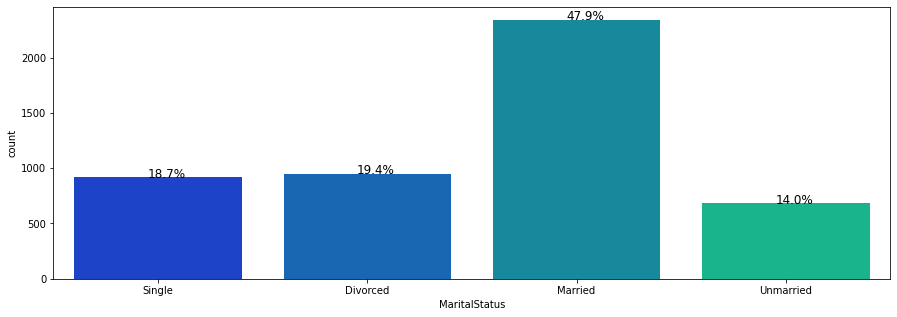

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourismData["MaritalStatus"],palette='winter')
perc_on_bar(ax,tourismData["MaritalStatus"])

### Around 48% of the customers are Married and the others(Single, Divorced or Unmarried) having a similar distribution.

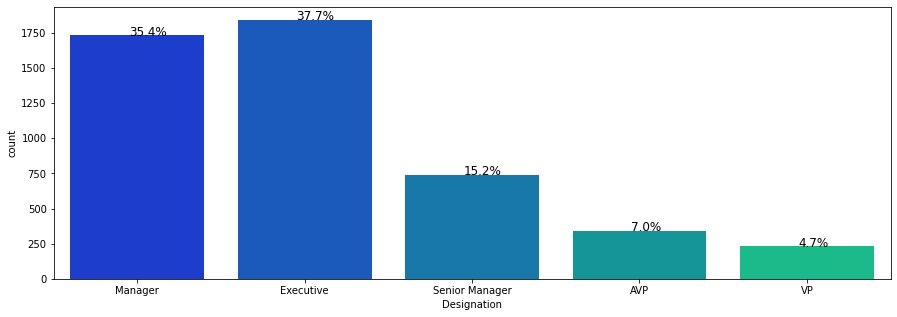

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourismData["Designation"],palette='winter')
perc_on_bar(ax,tourismData["Designation"])

### Around 35-37% of customer are Managers or Executives with the rest (Senior Manager, AVP, VP) with low distribution

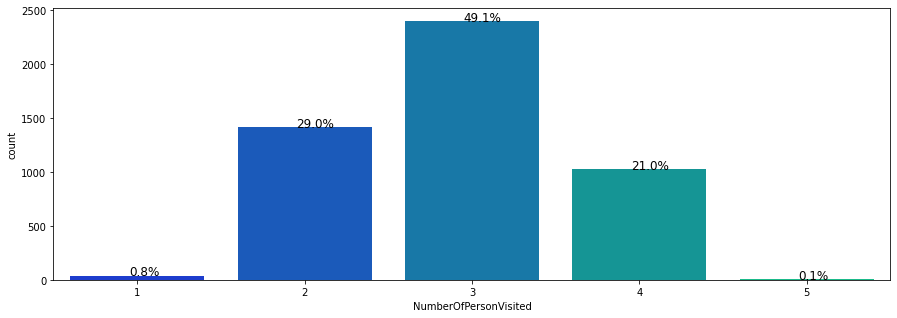

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourismData["NumberOfPersonVisited"],palette='winter')
perc_on_bar(ax,tourismData["NumberOfPersonVisited"])

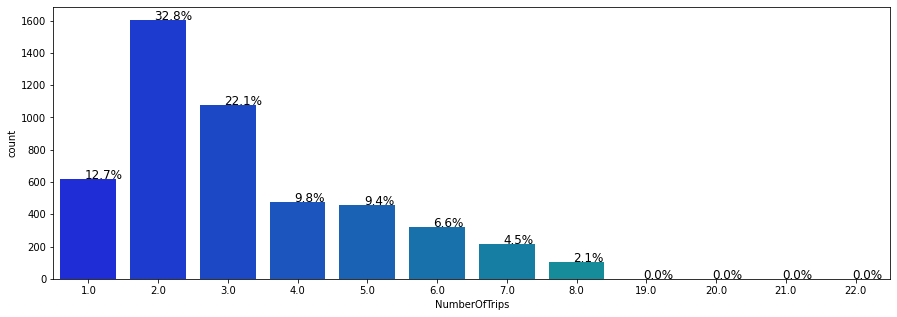

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(tourismData["NumberOfTrips"],palette='winter')
perc_on_bar(ax,tourismData["NumberOfTrips"])

### Distribution of how many trips the customers took

## Bivarate Analysis

In [ ]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,tourismData['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,tourismData['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


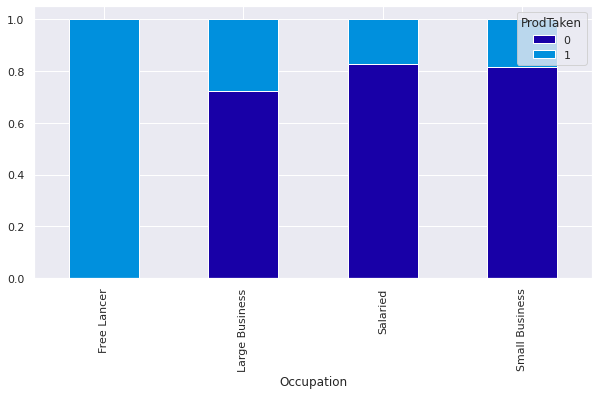

In [ ]:
stacked_plot(tourismData['Occupation'])

### Occupation vs ProdTaken : Looks like Salaried / Small Business are the ones who are taking the production with similar pattern (around 20%) and around 40% of the LargeBusiness customers tend to take the product.

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


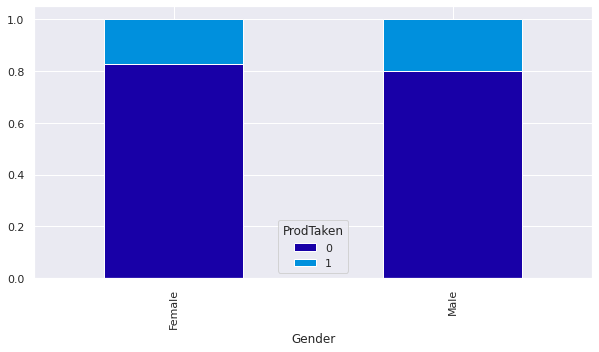

In [ ]:
stacked_plot(tourismData['Gender'])

### Gender vs ProdTaken : Around 20-25% of the customers across Gender take the product.

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


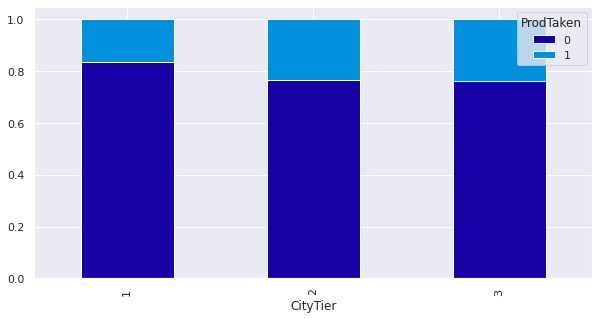

In [ ]:
stacked_plot(tourismData['CityTier'])

### ProdTaken vs CityTier : Similar Pattern across different city tiers (tier 2 and tier 3 having more or less a simiar pattern)

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


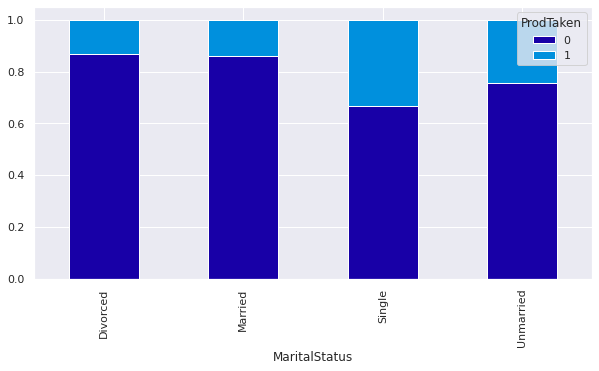

In [ ]:
stacked_plot(tourismData['MaritalStatus'])

### ProdTaken vs Martial Status : Singled and Unmarried seem to avail the prod more than Divorced and Married Customers.

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


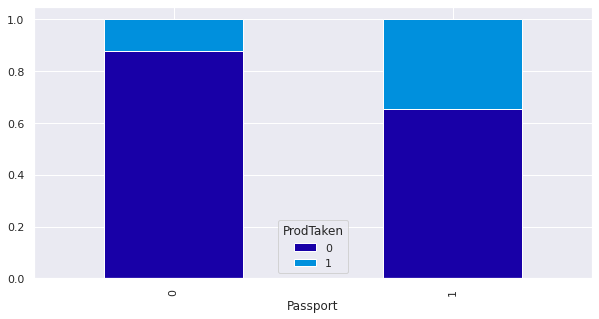

In [ ]:
stacked_plot(tourismData['Passport'])

### ProdTaken vs Passport : People who tend to have a passport seems to take the product.

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


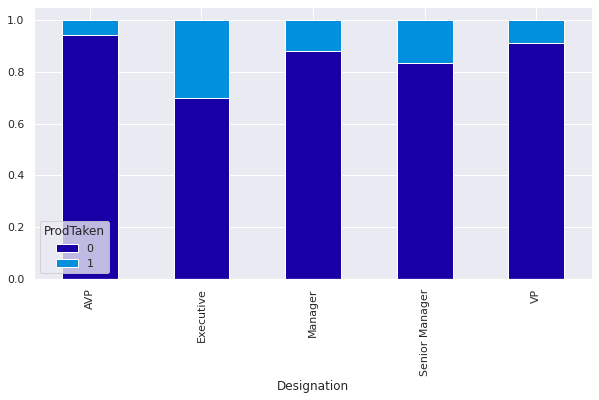

In [ ]:
stacked_plot(tourismData['Designation'])

### ProdTaken vs Designation : % of Executives seem to be more who avail the product, followed by Senior Managers, Managers, VP

ProdTaken     0    1   All
Age                       
18.0          6    8    14
19.0         11   21    32
20.0         13   25    38
21.0         18   23    41
22.0         31   15    46
23.0         33   13    46
24.0         38   18    56
25.0         54   20    74
26.0         69   37   106
27.0        108   30   138
28.0        121   26   147
29.0        121   57   178
30.0        151   48   199
31.0        162   41   203
32.0        157   40   197
33.0        149   40   189
34.0        167   44   211
35.0        203   34   237
36.0        204   27   231
37.0        343   68   411
38.0        161   15   176
39.0        136   14   150
40.0        123   23   146
41.0        131   24   155
42.0        122   20   142
43.0        120   10   130
44.0         88   17   105
45.0         98   18   116
46.0        110   11   121
47.0         76   12    88
48.0         54   11    65
49.0         56    9    65
50.0         74   12    86
51.0         73   17    90
52.0         54   14    68
5

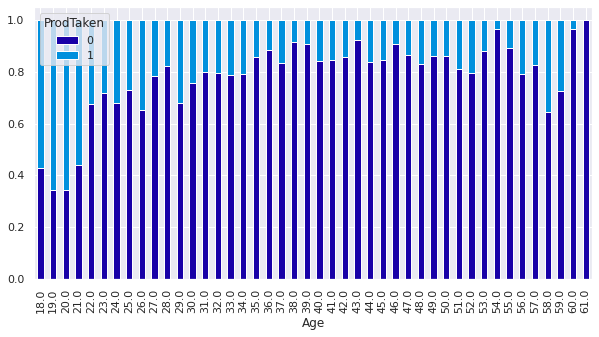

In [ ]:
stacked_plot(tourismData['Age'])

### Distribution of the ProdTaken across Age (Young People are the one who avail the product more)

## Converting the categorical variables and replacing the strucutre.

In [ ]:
for feature in tourismData.columns: # Loop through all columns in the dataframe
    if tourismData[feature].dtype == 'object': # Only apply for columns with categorical strings
        tourismData[feature] = pd.Categorical(tourismData[feature])# Replace strings with an integer
tourismData.head(10)

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Multi,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Multi,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Multi,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Super Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [ ]:
tourismData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.593494,9.099357,18.0,31.00,37.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.157529,8.420753,5.0,9.00,13.0,19.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.201105,1.833979,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [ ]:
tourismData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   int64   
 2   Age                      4888 non-null   float64 
 3   PreferredLoginDevice     4888 non-null   category
 4   CityTier                 4888 non-null   int64   
 5   DurationOfPitch          4888 non-null   float64 
 6   Occupation               4888 non-null   category
 7   Gender                   4888 non-null   category
 8   NumberOfPersonVisited    4888 non-null   int64   
 9   NumberOfFollowups        4888 non-null   float64 
 10  ProductPitched           4888 non-null   category
 11  PreferredPropertyStar    4888 non-null   float64 
 12  MaritalStatus            4888 non-null   category
 13  NumberOfTrips            4888 non-null   float64 
 14  Passport

In [ ]:
replaceStruct = {
                "PreferredLoginDevice":     {"Self Enquiry": 1, "Company Invited": 2 ,"Unknown":-1},
                "ProductPitched":     {"Multi": 1, "Super Deluxe": 2 ,"Standard": 3 ,"Deluxe": 4,"King":5},
                "Occupation": {"Salaried": 1, "Small Business":2 , "Large Business": 3, "Free Lancer": 4},
                 "Gender": {"Male": 1, "Female":2},
                 "MaritalStatus":     {"Married": 1, "Divorced": 2 ,"Single": 3 ,"Unmarried": 4},
                "Designation": {"Executive": 1, "Manager": 2 , "Senior Manager": 2 ,"AVP": 3, "VP": 4 },
                #"Age_Cat" : {"18-27": 1, "28-37": 2, "38-47": 3, "48-61": 4}
                 }
#oneHotCols=["purpose","housing","other_credit","job"]


In [ ]:
tourismData=tourismData.replace(replaceStruct)
tourismData.head()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,1,3,6.0,1,2,3,3.0,2,3.0,3,1.0,1,2,1,0.0,2,20993.0
1,200001,0,49.0,2,1,14.0,1,1,3,4.0,2,4.0,2,2.0,0,3,1,2.0,2,20130.0
2,200002,1,37.0,1,1,8.0,4,1,3,4.0,1,3.0,3,7.0,1,3,0,0.0,1,17090.0
3,200003,0,33.0,2,1,9.0,1,2,2,3.0,1,3.0,2,2.0,1,5,1,1.0,1,17909.0
4,200004,0,37.0,1,1,8.0,2,1,2,3.0,1,4.0,2,1.0,0,5,1,0.0,1,18468.0


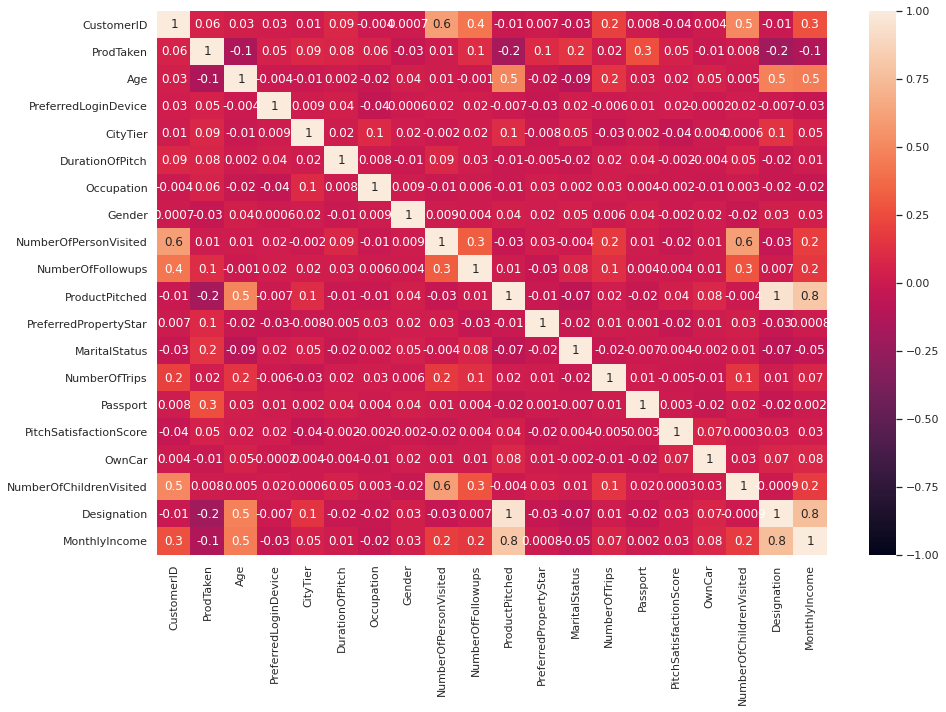

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(tourismData.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

### From the heatmap it looks like Designation and MonthlyIncome are highly correlated and similarly ProductPitched and MonthlyIncome are also highly correlated.

# Split the data into train and test sets
When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
This is done by setting the stratify parameter to target variable in the train_test_split function.

In [ ]:
X = tourismData.drop(["ProdTaken",'CustomerID','Designation'] , axis=1)
y = tourismData.pop("ProdTaken")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

**Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision, F1 Score and ROC AUC Score
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    #F1 Score of the model
    train_f1score = metrics.f1_score(y_train,pred_train)
    test_f1score = metrics.f1_score(y_test,pred_test)

    #ROC Score of the model
    train_rocauc_score = roc_auc_score(y_train,pred_train)
    test_rocauc_score = roc_auc_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1score,test_f1score,train_rocauc_score,test_rocauc_score))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 Score on test set : ",metrics.f1_score(y_test,pred_test))
        print("ROC_AUC Score on training set : ",roc_auc_score(y_train,pred_train))
        print("ROC_AUC Score on test set : ",roc_auc_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

In [ ]:
##  Function to show importances
def show_importances(importances):
    importances = importances.feature_importances_
    indices = np.argsort(importances)
    feature_names = list(X.columns)
    plt.figure(figsize=(12,12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

## Building the model - Bagging
- We are going to build 3 ensemble models here - Bagging Classifier, Random Forest Classifier and Decision Tree
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate the following metrics - Accuracy, Precision, Recall, F1Score and ROC AUC Score.
- `Accuracy` - It gives the ratio of sum of (True positives + True Negatives) to sum of (True positives, True Negatives, False Positive and False Negatives), so  Accuracy implies how accurate your prediction is.
- `Precision` - It gives the ratio of True positives to sum of (True Positive and False Positives), so precision is out of all the predicted customer what fraction will take the product.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter
- `F1 Score` - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
- `ROC AUC Score` - It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.

- Important Metric Here : The company wants to offer a new package to the customer and the customer should avail that. The focus should be on true negatives and false positives. The campaign should try and convert this segment and offer them attractive packages so that they can avail the offer and take the package with the Bank.
- In case of False negative company will lose few customers but it will be good to include them in the campaign depending on the company's policy because they are potential customers who will be taking up the package though the prediction might be wrong wrong.
- After achieving the `Accuracy` and `Precision` we can deploy the model for practical use. We can in parallel look at the ROC AUC Score .The company can predict who will be their potential customers for the package and they can use the model for coming up with the offers for their upcoming customers.

- `Accuracy`, `Precision` and`ROC AUC Score` are the parameters which are important from the company perspective compared to `Recall` because the company is not going to lose big even if they target these customers.

In [ ]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

In [ ]:
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [ ]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

In [ ]:
make_confusion_matrix(rf_estimator,y_test)

In [ ]:
show_importances(rf_estimator)

### Let's try decision tree classifier:

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
get_metrics_score(dtree)

In [ ]:
make_confusion_matrix(dtree,y_test)

In [ ]:
show_importances(dtree)

**With default parameters:**

- All models - Bagging classifiers, random forest classifier and Decision Tree are overfitting the train data.
- All models are giving similar performance in terms of accuracy, precision, F1 Score and ROC AUC Score
- Decision Tree is having a lower precision compared to the other models with default parameters.

## Hyperparameter Tuning

### Bagging Classifier

**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split.
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

**Let's check different metrics for bagging classifier with best hyperparameters and build a confusion matrix.**

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

In [ ]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

### Insights
- We can see that test accuracy, Precision, F1 Score and ROC AUC Score for the bagging classifier have increased slightly after hyperparameter tuning.
- The model is overfitting the data
- The confusion matrix shows that the model is better at identifying the customers who will take the product

## Hyperparameter Tuning
### Random Forest Classifier
**Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split.
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1.
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.

In [ ]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [10,50,100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

In [ ]:
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

In [ ]:
make_confusion_matrix(rf_estimator_tuned,y_test)

In [ ]:
show_importances(rf_estimator_tuned)

### Insights
- We can see that random forest's performance has decreased as compared to the random forest model with default parameters.
- Model is slightly overfitting the data but not as much as the tuned bagging classifier.
- The accuracy, ROC AUC score and Precision has come down compared to random test with default. This means that the model is not good at identifying the customers who will take the product.

## Hyperparameter Tuning
### Decision Tree Classifier
**Now, let's see if we can get a better model by tuning the decision tree classifier. Some of the important hyperparameters available for random forest classifier are:**

In [ ]:
dtreeestimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtreeestimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtreeestimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtreeestimator.fit(X_train, y_train)

In [ ]:
dtree_estimator_tuned_score=get_metrics_score(dtreeestimator)

In [ ]:
make_confusion_matrix(dtreeestimator,y_test)

In [ ]:
show_importances(dtreeestimator)

#### The importance of feature is shown above with a maximum depth of 2.

### Insights
- The model performance (decision tree with tuned parameter)is not very good in accuracy, precision, f1score or roc auc score.

### Let's try using class_weights for random forest:
- We should make the model aware that the class of interest here is 'defaulters'.

- We can do so by passing the parameter `class_weights` available for random forest. This parameter is not available for the bagging classifier.

In [ ]:
# Choose the type of classifier.
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.2, 1: 0.8}],
    "n_estimators": [10,50,100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

In [ ]:
make_confusion_matrix(rf_estimator_weighted,y_test)

### Insights
- The model accuracy has decreased a bit but the overfitting has also been reduced and the model is generalizing well.
- The train and test recall both have increased significantly.
- We can see from the confusion matrix that the random forest model with class weights is now better at identifying the customer who will take the product as compared to other models.

### Checking the feature importance

In [ ]:
show_importances(rf_estimator_weighted)

### Comparing all models till now - Bagging default and tuned

In [ ]:
# defining list of models
models = [bagging_estimator,rf_estimator,dtree,bagging_estimator_tuned,rf_estimator_tuned,dtreeestimator,rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1score_train = []
f1score_test = []
rocaucscore_train = []
rocaucscore_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1score_train.append(np.round(j[6],2))
    f1score_test.append(np.round(j[7],2))
    rocaucscore_train.append(np.round(j[8],2))
    rocaucscore_test.append(np.round(j[9],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Random Forest with deafult parameters','Decision Tree',
                                          'Tuned Bagging Classifier','Tuned Random Forest Classifier','Tuned Decision Tree','Random Forest with class_weights'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1Score':f1score_train,'Test_F1Score':f1score_test,
                                          'Train_ROCAUC_Score':rocaucscore_train,'Test_ROCAUC_Score':rocaucscore_test
                                }
                               )
comparison_frame

## Insights of Bagging models
- With default parameter of Bagging Classifier, Random Forest and Decision tree the model we can see overfitting.
- The importance parameters to look for is accuracy, precision and roc_auc score and we could see that Tuned Random Forest and Random Forest with class_weights have not been overfitting and also we could see a good performance indicators in terms of accuracy, precision and roc auc score.

## Building the model - Boosting
- We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate the following metrics - Accuracy, Precision, Recall, F1Score and ROC AUC Score.

- `Accuracy` - It gives the ratio of sum of (True positives + True Negatives) to sum of (True positives, True Negatives, False Positive and False Negatives), so  Accuracy implies how accurate your prediction is.
- `Precision` - It gives the ratio of True positives to sum of (True Positive and False Positives), so precision is out of all the predicted customer what fraction will take the product.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter
- `F1 Score` - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
- `ROC AUC Score` - It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.

- Important Metric Here : The company wants to offer a new package to the customer and the customer should avail that. The focus should be on true negatives and false positives. The campaign should try and convert this segment and offer them attractive packages so that they can avail the offer and take the package with the Bank.
- In case of False negative company will lose few customers but it will be good to include them in the campaign depending on the company's policy because they are potential customers who will be taking up the package though the prediction might be wrong wrong.
- After achieving the `Accuracy` and `Precision` we can deploy the model for practical use. We can in parallel look at the ROC AUC Score .The company can predict who will be their potential customers for the package and they can use the model for coming up with the offers for their upcoming customers.

- `Accuracy`, `Precision` and`ROC AUC Score` are the parameters which are important from the company perspective compared to `Recall` because the company is not going to lose big even if they target these customers.

### AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

In [ ]:
make_confusion_matrix(abc,y_test)

### Insights Adaboost classifier
- Adaboost Classifier with default parameter doesn't seem to overfit
- The precision, accuracy and rocauc score are low, but definitely not bad


### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

In [ ]:
make_confusion_matrix(gbc,y_test)

### Insights Gradient Boost classifier
- Gradient Classifier with default parameter doesn't seem to overfit
- The precision, accuracy and rocauc score are low, but definitely not bad

### XGBoost Classifier

In [ ]:
#xgb = XGBClassifier(random_state=1)
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

In [ ]:
make_confusion_matrix(xgb,y_test)

### XGBoost Classifier
- With default parameters we see there is a overfitting
- The accuracy, precision and roc auc score is better than the previous boosting models, but it might be due to the overfit.

## Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

### Insights
- The model is overfitting compared to the AdaBoost Classifier with default parameters.
- May be, the model can be improved by playing around with other default parameters.

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [ ]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

**As compared to the model with default parameters:**

- As we are getting same/similar results, when we init = AdaBoostClassifier(). This model with init parameter is not of significant importance.

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

### Insights
- The model performace has not increased by much when compared to gradient boost default parameters.
- The model has started to overfit the train data in terms of accuracy, precision, f1score and rocaucscore when you compare the gradient boost with default parameters

In [ ]:
show_importances(gbc_tuned)

### XGBoost Classifier

**XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation [here](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters). Some of the important parameters are:**
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [ ]:
# Choose the type of classifier.
#xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_tuned = XGBClassifier(random_state=1)


# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

### Insights
- The model is better than the XGBoost default and it doesn't overfit like XGBoost default
- The tuned model is not overfitting and generalizes well.
- ROC AUC Score and the accuracy is definitely good.

In [ ]:
show_importances(xgb_tuned)

### Passport and Martial Status are the two important features that are of importance for XGBoost Tuned with hypermaters.

### Stacking Classifier
**Stacking Model
Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtreeestimator),('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator_score=get_metrics_score(stacking_estimator)

In [ ]:
make_confusion_matrix(stacking_estimator,y_test)

### Insights - Stacking Classifer
- Not much overfitting when you look at XGBoos with default or Adaboost tuned.
- The precision seems to be higher when compared to XGBoost Tuned and a decent accuracy and roc auc score.

In [ ]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1score_train = []
f1score_test = []
rocaucscore_train = []
rocaucscore_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1score_train.append(np.round(j[6],2))
    f1score_test.append(np.round(j[7],2))
    rocaucscore_train.append(np.round(j[8],2))
    rocaucscore_test.append(np.round(j[9],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned',
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned','Stacking Estimator'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1Score':f1score_train,'Test_F1Score':f1score_test,
                                          'Train_ROCAUC_Score':rocaucscore_train,'Test_ROCAUC_Score':rocaucscore_test
                                }
                               )
comparison_frame

# What each means in the confusion matrix
- Business Insights Confusion matrix means
- True Positive (observed=1,predicted=1): Predicted that customer will purchase the package offerred to them
- False Positive (observed=0,predicted=1): Predicted that customer will purchase the package but the customer doesn't.
- True Negative (observed=0,predicted=0):Predicted that customer will not purchase the package offered and the customer will not purchase
- False Negative (observed=1,predicted=0): Predicted that customer will not purchase offered package and the customer purchases.
- Accuracy, Precision and ROC AUC Score are the key metrics in this.

# Focus is going to predict the potential customers who is going to purchase
- The focus should be on true negatives and false positives. The campaign should try and convert this segment and offer them attractive packages so that they can avail the offer and take the package with the company
- In case of False negative company will lose few customers but it will be good to include them in the campaign depending on the company's policy because they are potential customers who will be taking up the package  though the prediction might be wrong.

# Model Analysis
- After looking at the different model(bagging and boosting).
- In case of Bagging, we could see the tuned parameters (Random Forest, Decision Tree and Random forest with class weights) works well in terms of not overfitting the training vs testing data
- But if you look into more details on the precision, tuned precision tree is not having a great precision.
- In case of Boosting, the tuned parameters (XGBoost, Gradient Boost) works well in terms of not overfitting training vs test data
- But if you look into more details on the precision and accuracy gradient boost tuned is working well with a good roc auc score.

# Conclude with the key takeaways for the business - What would your advice be to grow the business?
- Accuracy and Precision are the key parameters which should be considered also we should consider false negatives as well when it comes to our model because they are also potential customers who will take the package even though it is not offered to them.
- ROC AUC Score anything above 0.6 or 0.7 should be a good model. This should be coupled along with accuracy and precision as well.